## Observations and Insights 

In [ ]:
#Observations and Insights

#1. Ketapril and Ramicane had the highest number of timepoints recorded. This may indicate that those treatments 
#   were more effective since the mice lived longer. This is also supported by the fact that Ramicane's overall 
#   distribution for final tumor sizes was significantly lower than the other three boxplots.
    
#2. Ramicane and Capomulin have the lowest average Tumor Sizes across all Timepoints and this may indicate that they are effective treatment methods.

#3. Mouse i557 experienced a sharp drop in tumor size after treatment which gradually grew with time. 
#   This may indicate the treatment has no significant long term effects.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print("Number of unique mice:", combined_data["Mouse ID"].nunique())

Number of unique mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
print("Number of unique mice in the clean DataFrame:", clean_data["Mouse ID"].nunique())

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_data = clean_data.groupby("Drug Regimen")
mean_df = group_data.mean()
median_df = group_data.median()
var_df = group_data.var()
std_df = group_data.std()
sem_df = group_data.sem()

summary_df = pd.DataFrame()
summary_df["Mean of Tumor Volume (mm3)"] = mean_df["Tumor Volume (mm3)"]
summary_df["Median of Tumor Volume (mm3)"] = median_df["Tumor Volume (mm3)"]
summary_df["Variance of Tumor Volume (mm3)"] = var_df["Tumor Volume (mm3)"]
summary_df["STDEV of Tumor Volume (mm3)"] = std_df["Tumor Volume (mm3)"]
summary_df["SEM of Tumor Volume (mm3)"] = sem_df["Tumor Volume (mm3)"]

summary_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),STDEV of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

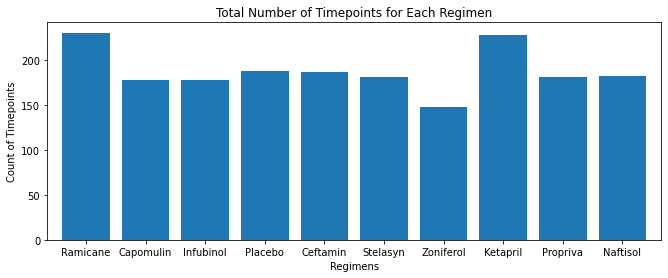

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_df = group_data.count()
regimens = [regimen for regimen in clean_data["Drug Regimen"].unique()]
counts = [count for count in count_df["Timepoint"]]

bar_df = pd.DataFrame()
bar_df["Regimens"] = regimens
bar_df["Count of Timepoints"] = counts

chart = bar_df.plot.bar(x = "Regimens",
    rot = 0,
    legend = False,
    width = .8,
    title = "Total Number of Timepoints for Each Regimen", 
    xlabel = "Regimens",
    ylabel = "Count of Timepoints",
    figsize = (11,4))

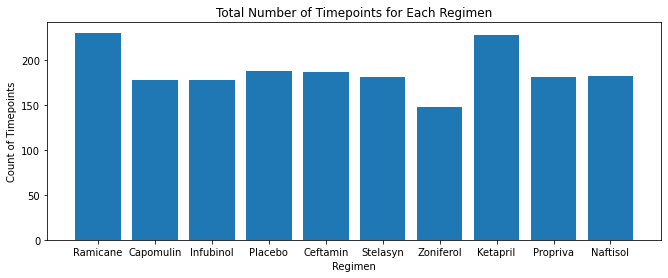

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(11,4)) 
plt.bar(regimens, count_df["Timepoint"])
plt.title("Total Number of Timepoints for Each Regimen")
plt.ylabel("Count of Timepoints")
plt.xlabel("Regimen")
plt.show()

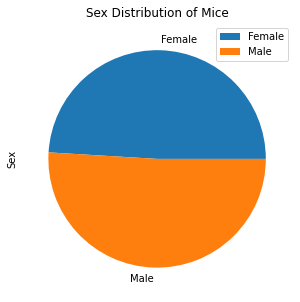

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_sex_df = clean_data.groupby("Sex").count()
pie_chart = groupby_sex_df.plot.pie(y = "Mouse ID", title = "Sex Distribution of Mice", ylabel = "Sex", figsize = (5,5))

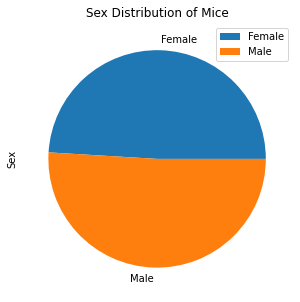

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(groupby_sex_df["Mouse ID"], labels = ["Female", "Male"])
plt.ylabel("Sex")
plt.title("Sex Distribution of Mice")
plt.legend(labels = ["Female", "Male"], loc = "best")
plt.show()

In [37]:
groupby_sex_df["Mouse ID"]

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_data.groupby("Mouse ID", as_index = False).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume_df = max_time.merge(clean_data, on=["Mouse ID", "Timepoint"])[["Mouse ID", "Drug Regimen_x", "Timepoint", "Tumor Volume (mm3)_y"]]
volume_df

,Mouse ID,Drug Regimen_x,Timepoint,Tumor Volume (mm3)_y
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
243,z435,Propriva,10,48.710661
244,z578,Ramicane,45,30.638696
245,z581,Infubinol,45,62.754451
246,z795,Naftisol,45,65.741070


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_df = pd.DataFrame()

# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:
    volume_data = []
    count = 0
    for entry in volume_df["Drug Regimen_x"]:
        if entry == treatment:
            volume_data.append(volume_df.iloc[count]["Tumor Volume (mm3)_y"])
        count += 1
    treatment_df[treatment] = volume_data
    
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_df:
    sorted_df = treatment_df.sort_values(x)
    q_one = sorted_df[x].quantile(.25)
    q_three = sorted_df[x].quantile(.75)
    iqr = st.iqr(sorted_df[x])
    lower_bound = q_one - 1.5 * iqr
    upper_bound = q_three + 1.5 * iqr 
    
    #Find Outliers
    outliers = []
    index_of_outliers = []
    for value in treatment_df[x]:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
            index_of_outliers.append(clean_data[clean_data["Tumor Volume (mm3)"] == value].index.values[0])
            
    if outliers == []:
        print(f"There are no outliers for {x}.")
    else:
        print(f"The outliers for {x} are: {outliers} at index(es): {index_of_outliers}")
        

There are no outliers for Capomulin.
There are no outliers for Ramicane.
The outliers for Infubinol are: [36.3213458] at index(es): [669]
There are no outliers for Ceftamin.


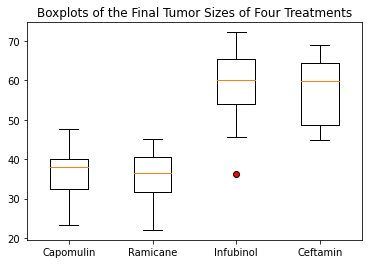

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dict = {}
for x in treatment_df:
    dict[x] = treatment_df[x]
    
fig, ax = plt.subplots()
ax.boxplot(dict.values(), flierprops={'marker': 'o', 'markerfacecolor': 'red'})
ax.set_xticklabels(dict.keys())
ax.set_title("Boxplots of the Final Tumor Sizes of Four Treatments")
plt.show()

## Line and Scatter Plots

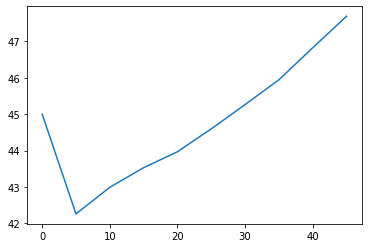

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse_i557 = clean_data[clean_data["Mouse ID"] == "i557"]
plt.plot(mouse_i557["Timepoint"], mouse_i557["Tumor Volume (mm3)"])
plt.show()

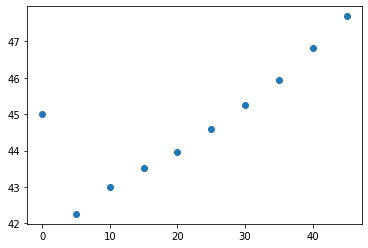

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(mouse_i557["Timepoint"], mouse_i557["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x=mouse_i557["Timepoint"]
y=mouse_i557["Tumor Volume (mm3)"]
c_coeff = st.pearsonr(x, y)
print(f"The correlation coefficient is: {c_coeff[0]}.")

The correlation coefficient is: 0.8271668086278186.


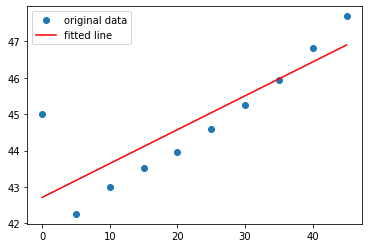

In [34]:
res = st.linregress(mouse_i557["Timepoint"], mouse_i557["Tumor Volume (mm3)"])
#print(f"Linear regression line of best fit: y = {slope}x + {intercept}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()